<a href="https://colab.research.google.com/github/Seandaytoy1005/MMO/blob/main/pk1_%D0%A1%D0%B5_%D0%A6%D0%B7%D1%8F%D0%B2%D1%8D%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target




In [9]:
print("первые несколько строк набора данных：")
print(df.head())

первые несколько строк набора данных：
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [10]:
print("\nОбщая информация о наборе данных：")
print(df.info())


Общая информация о наборе данных：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


In [14]:
print("\nСтатистическая сводка целевой переменной：")
print(df['target'].describe())


Статистическая сводка целевой переменной：
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64


In [5]:

X, y = diabetes.data, diabetes.target

feature_to_scale_index = 0
feature_to_scale = X[:, feature_to_scale_index].reshape(-1, 1)
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(feature_to_scale)
print("Необработанные данные:")
print(feature_to_scale[:5])
print("\nмасштабированные данные:：")
print(scaled_feature[:5])

Необработанные данные:
[[ 0.03807591]
 [-0.00188202]
 [ 0.08529891]
 [-0.08906294]
 [ 0.00538306]]

масштабированные данные:：
[[0.66666667]
 [0.48333333]
 [0.88333333]
 [0.08333333]
 [0.51666667]]


In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

df = pd.DataFrame(data=X, columns=diabetes.feature_names)
df['target'] = y

correlation_matrix = df.corr().abs()
num_features_to_select = 5
best_features = SelectKBest(score_func=f_regression, k=num_features_to_select)
best_features.fit(X, y)
selected_feature_indices = best_features.get_support(indices=True)
selected_features = df.columns[selected_feature_indices]

print("Пять самых актуальных：")
print(selected_features)


Пять самых актуальных：
Index(['bmi', 'bp', 's3', 's4', 's5'], dtype='object')


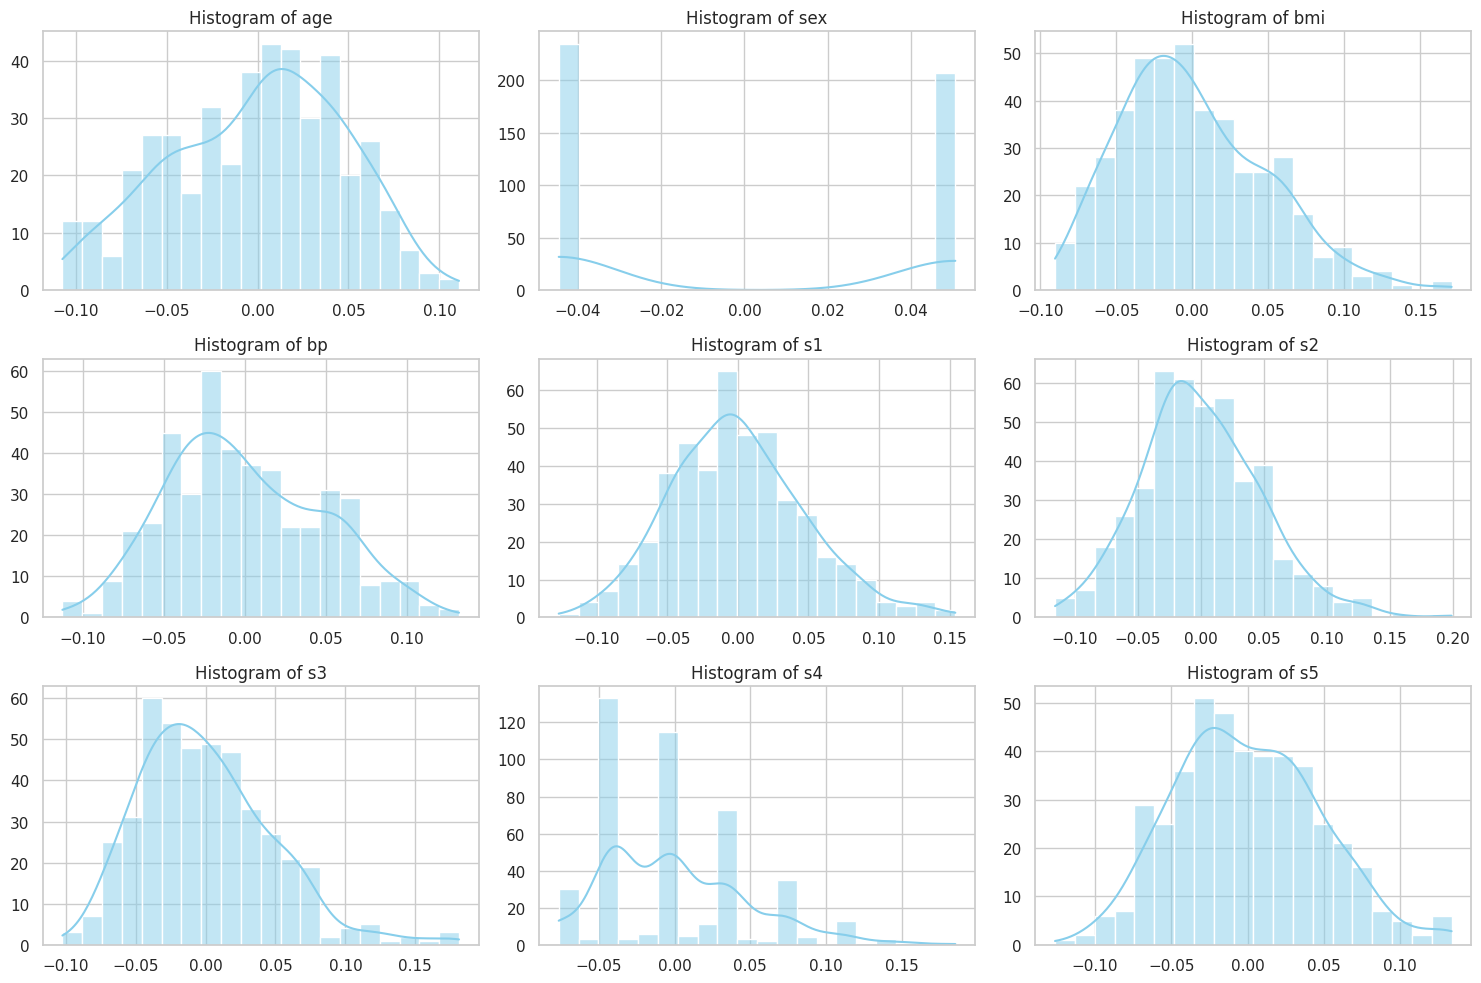

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
df = pd.DataFrame(data=X, columns=diabetes.feature_names)
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, (feature, ax) in enumerate(zip(df.columns, axes.flatten())):
    sns.histplot(df[feature], bins=20, ax=ax, kde=True, color='skyblue')
    ax.set_title(f'Histogram of {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()
